# AIQDSC28 – Introduction to deep learning  Algorithms Nicola Ronzoni 

organization of the work: 

The final goal of the project is to develop two neural networks, one with no-text info (numeric variables) and one with no-text info and text info (doctor's reports), that give me the re-hospitalization prediction. I use as target variable the DAYS_NEXT_ADMIT.
Since DAYS_NEXT_ADMIT contain a lot of Nan values, I will carefully pre-process them in the first section.
 
<h2>The project have different sections:<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load,-inspect-and-filter-the-data" data-toc-modified-id="Load, inspect and filter the data"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load, inspect and filter the data</a></span></li><li><span><a href="#Normalization-of-the-text" data-toc-modified-id="Normalization of the text"><span class="toc-item-num">2&nbsp;&nbsp;</span>Normalization of the text</a></span></li><li><span><a href="#Treatment-of-datetime-variable" data-toc-modified-id="Treatment of datetime variable"><span class="toc-item-num">3&nbsp;&nbsp;</span>Treatment of datetime variable</a></span></li><li><span><a href="#Convertion-of-categorical-variables-in-numeric-ones" data-toc-modified-id="Convertion of categorical variables into numeric ones"><span class="toc-item-num">4&nbsp;&nbsp;</span>Convertion of categorical variables into numeric ones</a></span></li><li><span><a href="#Creation-of-the-dataset-for-the-neural-networks" data-toc-modified-id="Creation of the dataset for the neural networks"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creation of the dataset for the neural networks</a></span></li><li><span><a href="#Definition-of-the-target-for-the-neural-networks" data-toc-modified-id="Target variable for the neural networks"><span class="toc-item-num">6&nbsp;&nbsp;</span>Target variable for the neural networks</a></span></li><li><span><a href="#Feature-selection-for-no-text-neural-networks" data-toc-modified-id="Feature selection for no text neural networks"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature selection for no text neural networks</a></span></li><li><span><a href="#Neural-networks-for-no-text" data-toc-modified-id="Neural networks for no text"><span class="toc-item-num">8&nbsp;&nbsp;</span>Neural networks for no text</a></span></li><li><span><a href="#Neural-network-for-no-text-and-text-info" data-toc-modified-id="Neural network for no text and text info"><span class="toc-item-num">9&nbsp;&nbsp;</span>Neural network for no text and text info</a></span></li>
<li><span><a href="#Conclusion-and-possible-future-work" data-toc-modified-id="Conclusion and possible future work"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion and possible future work</a></span></li>

## Load, inspect and filter the data 

In [1]:
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import train and test set 
df_train = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/MIMIC-III-readmission/train.csv.zip")
df_test = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/MIMIC-III-readmission/test.csv.zip")


df_train.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,...,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,OUTPUT_LABEL
0,937,148592,2163-01-20 18:39:00,2163-01-24 08:00:00,0.061806,2163-01-24 09:29:00,EMERGENCY,2163-01-26 08:00:00,DEAD/EXPIRED,Medicare,...,0,0,0,0,1,0,0,0,0,1
1,3016,159142,2107-01-23 02:45:00,2107-01-26 14:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,...,2,0,0,0,0,0,0,1,0,0
2,2187,186282,2134-06-24 23:30:00,2134-07-02 17:45:00,NaN,NaN,EMERGENCY,NaN,REHAB/DISTINCT PART HOSP,Medicaid,...,1,2,1,0,3,0,0,4,0,0
3,19213,140312,2202-11-02 12:32:00,2202-11-05 14:20:00,12.968056,2202-11-18 13:34:00,EMERGENCY,NaN,HOME,Medicare,...,0,0,0,0,0,0,0,1,1,1
4,425,118058,2149-05-13 12:23:00,2149-05-26 20:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,...,0,0,0,0,0,0,0,2,1,0


In [3]:
#shape of the train and test set
df_train.shape, df_test.shape

((2000, 34), (901, 34))

In [4]:
#Number of non-Nan values per variable in train test 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SUBJECT_ID          2000 non-null   int64  
 1   HADM_ID             2000 non-null   int64  
 2   ADMITTIME           2000 non-null   object 
 3   DISCHTIME           2000 non-null   object 
 4   DAYS_NEXT_ADMIT     1210 non-null   float64
 5   NEXT_ADMITTIME      1210 non-null   object 
 6   ADMISSION_TYPE      2000 non-null   object 
 7   DEATHTIME           158 non-null    object 
 8   DISCHARGE_LOCATION  2000 non-null   object 
 9   INSURANCE           2000 non-null   object 
 10  MARITAL_STATUS      1924 non-null   object 
 11  ETHNICITY           2000 non-null   object 
 12  DIAGNOSIS           1998 non-null   object 
 13  TEXT                1925 non-null   object 
 14  GENDER              2000 non-null   object 
 15  DOB                 2000 non-null   object 
 16  blood 

Since I would like to predict re-hospitalization, I delete observation of death patient in order to avoid data leakage. 
I would like to obtain neural networks that works with alive patients. If I train the neural network considering also death patients this additional information can allow the model to learn or know something that it otherwise would not know.



In [5]:
# keep patients in which Deathtime equal to Nan in train and test set 
df_train=df_train[df_train['DEATHTIME'].isna()]
df_test=df_test[df_test['DEATHTIME'].isna()]

In [6]:
df_train.shape, df_test.shape

((1842, 34), (843, 34))

I deleted 158 observation from the train set and 58 observation from the test set 

Another thing to do in order to develop a good model is to delete the observation of patient that are re-hospitalized after more than one year. If I look at the distribution of the DAYS_NEXT_ADMIT I have more than 90% of the re-hospitalization before one year of time. After one year it is possible that the past medical history of the patient affect less the re-hospitalization. In addition exogenous variable can influence the final output (car accident, broken leg ...) 

In [7]:
#look at the percentile of DAYS_NEXT_ADMIT in train and test set 
df_train['DAYS_NEXT_ADMIT'].quantile(0.93), df_test['DAYS_NEXT_ADMIT'].quantile(0.94)

#more than 90% of re-hospitalization are before one year time 

(422.82447222222225, 363.7695833333322)

In [8]:
#delete observation of the patient for which the time passed between the last two hospitalization is greater than one year 
#train
df_train= df_train[~(df_train['DAYS_NEXT_ADMIT'] >365)]
#test
df_test= df_test[~(df_test['DAYS_NEXT_ADMIT'] > 365)]

In [9]:
df_train.shape, df_test.shape

((1748, 34), (811, 34))

I deleted 94 observations from the train set and 32 observations from the test

In the variable DAYS_NEXT_ADMIT the Nan values are related to a specific value which is supposed to be obtained (number of day before the next admission greater than patients which are re-hospitalized OUTPUT_LABEL=1). I deal with Missing not at random data, that are the most problematic ones. 
First look at the ratio of Nan values in the train and test set 

In [10]:
#ratio of Nan in DAYS_NEXT_ADMIT train set 
ratio_train = np.sum(df_train['DAYS_NEXT_ADMIT'].isna())/len(df_train['DAYS_NEXT_ADMIT'])

In [11]:
ratio_train

0.3707093821510298

In [12]:
#ratio of Nan in DAYS_NEXT_ADMIT test set 
ratio_test = np.sum(df_test['DAYS_NEXT_ADMIT'].isna())/len(df_test['DAYS_NEXT_ADMIT'])

In [13]:
ratio_test

0.3970406905055487

In both cases, train and test set, a large portion of the data is missing.
In addition I deal with Missing not at random, I exclude to delete patients with DAYS_NEXT_ADMIT=Nan. They represent a particular subset of the target. If I delete this observations I reduce variability on the final output and this could afflict negatively the Neural Networks.  
I know that missing values on the variables DAYS_NEXT_ADMIT are positive related with a high number of days before the next re-hospitalization. I supppose that patients that are not re-hospitalized have a number of days next to admit higher than patients that are been re-hospitalized (OUTPUT_LABEL=1).I can substitute missing values with 365 days, that is my cut off point. By doing that I restrict the area of the prediction to one year after the last hospitalization, but I am going to predict also days next to admit for non re-hospitalized patients (OUTPUT_LABEL=0) 

In [14]:
#replace Nan value with the max 365 
df_train['DAYS_NEXT_ADMIT'] = df_train['DAYS_NEXT_ADMIT'].replace(np.nan, 365)
df_test['DAYS_NEXT_ADMIT'] = df_test['DAYS_NEXT_ADMIT'].replace(np.nan, 365)



<AxesSubplot:>

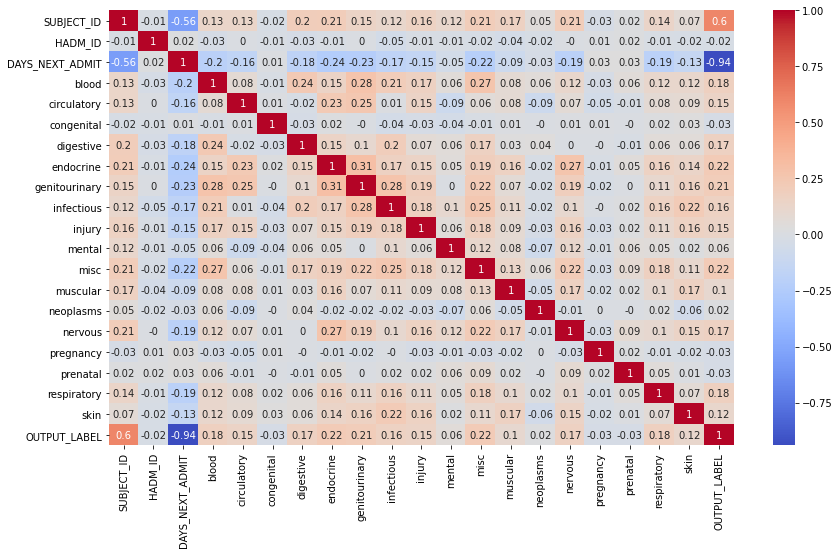

In [15]:
#plot the correlation of independent variables 
# Plot the correlation heatmap
from termcolor import colored as cl
plt.figure(figsize=(14, 8))
corr_matrix = df_train.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

<AxesSubplot:>

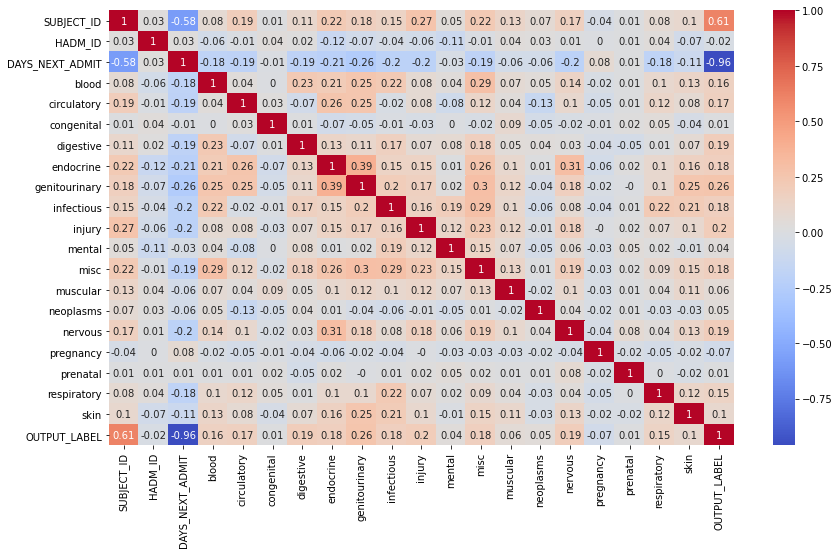

In [16]:
plt.figure(figsize=(14, 8))
corr_matrix = df_test.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

If I look at the correlation map, I can see a high negative correlation between OUTPUT_LABEL and DAYS_NEXT_ADMIT. This make sense: patients with OUTPUT_LABEL =1 have a DAYS_NEXT_ADMIT small, instead patients with OUTPUT_LABEL=0 have a DAYS_NEXT_ADMIT big. 

df_train and df_test will be sets in which i will put all new variable that I create. After that i will select careful the most important ones

## Normalization of the text 


By normalizing the reports, I attempt to reduce the randomness in it, bringing it closer to a predefined “standard”. This helps into reducing the amount of different information that the computer has to deal, and therefore improves efficiency. In addition I would like preserve information with high variability in order to explain my target variable.



At the end of this stage i will upload the new texts treated in df_train and df_test

In order to compute the normalization I select only the column of text from the train and test sets

In [17]:
#test

text_test=df_test['TEXT']

text_test.dtypes, text_test.shape




(dtype('O'), (811,))

In [18]:
#train 

text_train=df_train['TEXT']
text_train.dtypes, text_train.shape



(dtype('O'), (1748,))

Convertion of Upper case in lower case in the text_train and text_test arrays

In [19]:
#convert text in lower case 
import nltk.corpus
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
#test
text_test_lw =[]
for text in text_test:
    text_tokens_train=word_tokenize(str(text))
    lower_train=' '.join([w.lower() for w in text_tokens_train])
    text_test_lw.append(lower_train)
#train 
text_train_lw =[]
for text in text_train:
    text_tokens_train=word_tokenize(str(text))
    lower_train=' '.join([w.lower() for w in text_tokens_train])
    text_train_lw.append(lower_train)
    



Remove punctuation sign: This step is really important, in doctor's report there is a predefined layout with a lot of sign such as:
    [ ] * , . ; : 

In [20]:
#remove some punctuation sign

import string
#test
test_pc =[]
for text in text_test_lw:
    text_tokens_train=word_tokenize(str(text))
    punctual_train=' '.join([w.translate(str.maketrans('', '', string.punctuation)) for w in text_tokens_train])
    test_pc.append(punctual_train)
#train 
train_pc =[]
for text in text_train_lw:
    text_tokens_train=word_tokenize(str(text))
    punctual_train=' '.join([w.translate(str.maketrans('', '', string.punctuation)) for w in text_tokens_train])
    train_pc.append(punctual_train)

  
    






Stemming: Crude heuristic process that cuts off the end of words in the hope of achieving a reduction in the forms of a word.

In [21]:
#stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
stemmer = PorterStemmer()
#test
test_stem=[]
for text in test_pc:
    text_tokens_train=word_tokenize(str(text))
    stemmatized_train=' '.join([stemmer.stem(w) for w in text_tokens_train])
    test_stem.append(stemmatized_train)
#train
train_stem=[]
for text in train_pc:
    text_tokens_train=word_tokenize(str(text))
    stemmatized_train=' '.join([stemmer.stem(w) for w in text_tokens_train])
    train_stem.append(stemmatized_train)

    



Remove number: Date of birth, admission, dismission are present in clinical reports. They involve a lot of numbers, and in addition I have already this information in numerical variables.  

In [22]:
#remove number 

import re
#test
test_nu =[]
for text in test_stem:
    text_tokens_train=word_tokenize(str(text))
    nonum_train=' '.join([re.sub(r'\d+', '', w) for w in text_tokens_train])
    test_nu.append(nonum_train)
#train
train_nu =[]
for text in train_stem:
    text_tokens_train=word_tokenize(str(text))
    nonum_train=' '.join([re.sub(r'\d+', '', w) for w in text_tokens_train])
    train_nu.append(nonum_train)





Remove words that appears less than 5 times.The Majority of report's have more than 1000 words. With this passage I delete useless information

In [23]:
#remove words that appears less than 5 times   
from collections import Counter 

#train 
train_k=[]
for text in train_nu: 
    text_tokens_train=word_tokenize(str(text))
    counted=Counter(text_tokens_train)
    k_train=[el for el in text_tokens_train if text_tokens_train.count(el) >= 5] 
    more_train=' '.join(k_train)
    train_k.append(more_train)
#test 
test_k=[]
for text in test_nu: 
    text_tokens_test=word_tokenize(str(text))
    counted=Counter(text_tokens_test)
    k_test=[el for el in text_tokens_test if text_tokens_test.count(el) >= 5] 
    more_test=' '.join(k_test)
    test_k.append(more_test)



Remove stop words, of course I can add other words at the default ones. 

 Stop word by default delete: 'ourselves’, ‘hers’, ‘between’, ‘yourself’, ‘but’, ‘again’, ‘there’, ‘about’, ‘once’, ‘during’, ‘out’, ‘very’, ‘having’, ‘with’, ‘they’, ‘own’, ‘an’, ‘be’, ‘some’, ‘for’, ‘do’, ‘its’, ‘yours’, ‘such’, ‘into’, ‘of’, ‘most’, ‘itself’, ‘other’, ‘off’, ‘is’, ‘s’, ‘am’, ‘or’, ‘who’, ‘as’, ‘from’, ‘him’, ‘each’, ‘the’, ‘themselves’, ‘until’, ‘below’, ‘are’, ‘we’, ‘these’, ‘your’, ‘his’, ‘through’, ‘don’, ‘nor’, ‘me’, ‘were’, ‘her’, ‘more’, ‘himself’, ‘this’, ‘down’, ‘should’, ‘our’, ‘their’, ‘while’, ‘above’, ‘both’, ‘up’, ‘to’, ‘ours’, ‘had’, ‘she’, ‘all’, ‘no’, ‘when’, ‘at’, ‘any’, ‘before’, ‘them’, ‘same’, ‘and’, ‘been’, ‘have’, ‘in’, ‘will’, ‘on’, ‘does’, ‘yourselves’, ‘then’, ‘that’, ‘because’, ‘what’, ‘over’, ‘why’, ‘so’, ‘can’, ‘did’, ‘not’, ‘now’, ‘under’, ‘he’, ‘you’, ‘herself’, ‘has’, ‘just’, ‘where’, ‘too’, ‘only’, ‘myself’, ‘which’, ‘those’, ‘i’, ‘after’, ‘few’, ‘whom’, ‘t’, ‘being’, ‘if’, ‘theirs’, ‘my’, ‘against’, ‘a’, ‘by’, ‘doing’, ‘it’, ‘how’, ‘further’, ‘was’, ‘here’, ‘than’.
 
 Of course every report has a pre-filled intestation in which words that are not included in the list above are repeated a lot of time such as: 'patient','tablet','name','discharg','sig','histori','admiss','date','namepattern','note','am','pm','telephonefax','m','f','medic','time','servic','call','report','past','present','job','follow','followup','also','blood' 
 
 In addition I delete all numbers so unit measurement of medicine are useless: 'per','day','mg','md','daili','x','ml'

In [24]:
#remove english stop word
#creation of the set of stopwords
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['patient','tablet','name','discharg','sig','histori','admiss','date','namepattern','note','am','pm','telephonefax','m','f','medic','time','servic','call','report','past','present','job','day','mg','md','per','daili','blood','follow','followup','also','x','ml','hour']
stopwords.extend(newStopWords)
#test
test_sw = []
for text in test_k:
    text_tokens_train = word_tokenize(str(text))
    tokens_without_sw_train = [word for word in text_tokens_train if not word in stopwords]
    tokens_without_sw_s_train = ' '.join(tokens_without_sw_train)
    test_sw.append(tokens_without_sw_s_train)
#train 
train_sw = []
for text in train_k:
    text_tokens_train = word_tokenize(str(text))
    tokens_without_sw_train = [word for word in text_tokens_train if not word in stopwords]
    tokens_without_sw_s_train = ' '.join(tokens_without_sw_train)
    train_sw.append(tokens_without_sw_s_train)



Append the new variable to the dataset

In [25]:
#append the new var to the dataframe 
#train
df_train.insert(loc=1,column='text',value=train_sw)

In [26]:
#append the new var to the dataframe 
#test
df_test.insert(loc=1,column='text',value=test_sw)

## Treatment of datetime variable 

In this section I will treat variables in datetime format, in particular I will deal with: admit time, discharge time and date of birth of the patient. 

I suppose that the time passed in hospital is positive correlated with the probability of being re-hospitalize. More time a patient passed in hospital more probability this patient has to be re-hospitalized.  So I create a new numeric variable for the time passed in hospital during the last hospitalization.  

In [27]:
#create a new variable recovery for the amount of time passed in hospital. 
 

import datetime 
#train
admittime_train = pd.to_datetime(df_train['ADMITTIME'])
discharge_train =pd.to_datetime(df_train['DISCHTIME'])
recovery_time_train=discharge_train-admittime_train
#test
admittime_test= pd.to_datetime(df_test['ADMITTIME'])
discharge_test=pd.to_datetime(df_test['DISCHTIME'])
recovery_time_test=discharge_test-admittime_test



For the time passed in hospital I use only days. I am going to convert the format.

In [28]:
#change the format of the date into days 
recovery_time_train=recovery_time_train.dt.days
recovery_time_test=recovery_time_test.dt.days



In [29]:
recovery_time_test

0      39
1       6
2       4
3       6
4       9
       ..
896     3
897    11
898    15
899     6
900     2
Length: 811, dtype: int64

In [30]:
recovery_time_train

1        3
2        7
3        3
4       13
5        6
        ..
1995     4
1996     8
1997     8
1998     5
1999    11
Length: 1748, dtype: int64

For the variable date of birth I am going to consider only the year of birth, since this add enough variability.

In [31]:
#treatment of date of birth only take the year 
#train
dateofbirth_train=pd.to_datetime(df_train['DOB'])
#test
dateofbirth_test=pd.to_datetime(df_test['DOB'])

In [32]:
dateofbirth_train=dateofbirth_train.dt.year
dateofbirth_test=dateofbirth_test.dt.year

## Convertion of categorical variables in numeric ones 

In This section I convert categorical variables into numeric ones. 

Label encoding is simply converting each value in a column to a number. This work for the gender variable, because it is a nominal variable.

In [33]:
#train
df_train["GENDER"] = df_train["GENDER"].astype('category')
df_train["gender_cat"] = df_train["GENDER"].cat.codes
#test
df_test["GENDER"] = df_test["GENDER"].astype('category')
df_test["gender_cat"] = df_test["GENDER"].cat.codes



Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. The distance between two possible value can not correspond to the real distance in life. For Example in the variable DISCHARGE_LOCATION home could be set =1, long term care hospital =2 and short term hospital =3 but indeed I know that short term hospital is more close to home than the long term.
The alternative adopted, to treat ordinal variables, is to create a number of dummy variables (0/1) equal to the number of possible categories - 1 to avoid multicollinearity.

In [34]:
#generate dummy variables for each categorical variable. I am going to use a prefix in order to identify them better in the next step. 
#train
df_train=pd.get_dummies(df_train, columns=["ADMISSION_TYPE", "INSURANCE","MARITAL_STATUS","ETHNICITY","DISCHARGE_LOCATION",], prefix=["ADM", "INS","MAR","ETH","DIS"])
#test
df_test=pd.get_dummies(df_test, columns=["ADMISSION_TYPE", "INSURANCE","MARITAL_STATUS","ETHNICITY","DISCHARGE_LOCATION",], prefix=["ADM", "INS","MAR","ETH","DIS"])







Drop one categories from each original categorical variable to avoid multicollinearity. Doesn't matter which one, in any case the remaining dummies preserve the information.

In [35]:
#train 
df_train=df_train.drop(columns=["ADM_URGENT","INS_Private","MAR_SEPARATED","ETH_ASIAN","DIS_HOME"])
#test
df_test=df_test.drop(columns=["ADM_URGENT","INS_Private","MAR_SEPARATED","ETH_ASIAN","DIS_HOME"])

In [36]:
#print all variables that I have right now
df_train.columns

Index(['SUBJECT_ID', 'text', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DAYS_NEXT_ADMIT', 'NEXT_ADMITTIME', 'DEATHTIME', 'DIAGNOSIS', 'TEXT',
       'GENDER', 'DOB', 'blood', 'circulatory', 'congenital', 'digestive',
       'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc',
       'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal',
       'respiratory', 'skin', 'OUTPUT_LABEL', 'gender_cat', 'ADM_ELECTIVE',
       'ADM_EMERGENCY', 'INS_Government', 'INS_Medicaid', 'INS_Medicare',
       'INS_Self Pay', 'MAR_DIVORCED', 'MAR_MARRIED', 'MAR_SINGLE',
       'MAR_UNKNOWN (DEFAULT)', 'MAR_WIDOWED', 'ETH_BLACK/AFRICAN AMERICAN',
       'ETH_HISPANIC/LATINO', 'ETH_OTHER/UNKNOWN', 'ETH_WHITE',
       'DIS_DISC-TRAN CANCER/CHLDRN H', 'DIS_DISCH-TRAN TO PSYCH HOSP',
       'DIS_HOME HEALTH CARE', 'DIS_HOME WITH HOME IV PROVIDR',
       'DIS_HOSPICE-HOME', 'DIS_HOSPICE-MEDICAL FACILITY', 'DIS_ICF',
       'DIS_LEFT AGAINST MEDICAL ADVI', 'DIS_LONG TERM CARE HOSPITAL'

In [37]:
#check if the number of variable in the train and test set 
df_train.shape, df_test.shape 

((1748, 59), (811, 59))

## Creation of the dataset for the neural networks  

In this section I sum up all variable previously created and compute the last part of pre-treatment. I will select all new dummy variables instead of the categorical ones, the normalized text variable and of course the numeric variables already present in the initial dataset. 

In [38]:
#define a numeric dataset 
#not select deathtime column because it is an entire column of null 

#train
df_train1=df_train[['gender_cat', 'ADM_EMERGENCY','ADM_ELECTIVE', 'ETH_WHITE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','ETH_HISPANIC/LATINO', 'INS_Medicare','INS_Medicaid','INS_Government','INS_Self Pay', 'MAR_MARRIED','MAR_SINGLE','MAR_WIDOWED','MAR_DIVORCED','DIS_HOME HEALTH CARE','DIS_SNF','DIS_REHAB/DISTINCT PART HOSP','DIS_LONG TERM CARE HOSPITAL','DIS_DISC-TRAN CANCER/CHLDRN H','DIS_LEFT AGAINST MEDICAL ADVI','DIS_SHORT TERM HOSPITAL','DIS_HOME WITH HOME IV PROVIDR','DIS_DISCH-TRAN TO PSYCH HOSP','DIS_ICF','DIS_HOSPICE-MEDICAL FACILITY','DIS_HOSPICE-HOME', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin','DAYS_NEXT_ADMIT','text']]
df_train1.insert(loc=1,column='recovery_day',value=recovery_time_train)
df_train1.insert(loc=2,column='dob',value=dateofbirth_train)
#test
df_test1=df_test[['gender_cat', 'ADM_EMERGENCY','ADM_ELECTIVE', 'ETH_WHITE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','ETH_HISPANIC/LATINO', 'INS_Medicare','INS_Medicaid','INS_Government','INS_Self Pay', 'MAR_MARRIED','MAR_SINGLE','MAR_WIDOWED','MAR_DIVORCED','DIS_HOME HEALTH CARE','DIS_SNF','DIS_REHAB/DISTINCT PART HOSP','DIS_LONG TERM CARE HOSPITAL','DIS_DISC-TRAN CANCER/CHLDRN H','DIS_LEFT AGAINST MEDICAL ADVI','DIS_SHORT TERM HOSPITAL','DIS_HOME WITH HOME IV PROVIDR','DIS_DISCH-TRAN TO PSYCH HOSP','DIS_ICF','DIS_HOSPICE-MEDICAL FACILITY','DIS_HOSPICE-HOME', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin','DAYS_NEXT_ADMIT','text']]
df_test1.insert(loc=1,column='recovery_day',value=recovery_time_train)
df_test1.insert(loc=2,column='dob',value=dateofbirth_test)

in This last step I drop all rows that contain null.

In [39]:
#delete obs for which there is at least a null value in a column. 

#train
df_train1 = df_train1.dropna(how='any',axis=0) 
#test
df_test1= df_test1.dropna(how='any',axis=0)

In [40]:
df_train1.shape,df_test1.shape

((1748, 48), (721, 48))

In [41]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 1 to 1999
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender_cat                     1748 non-null   int8   
 1   recovery_day                   1748 non-null   int64  
 2   dob                            1748 non-null   int64  
 3   ADM_EMERGENCY                  1748 non-null   uint8  
 4   ADM_ELECTIVE                   1748 non-null   uint8  
 5   ETH_WHITE                      1748 non-null   uint8  
 6   ETH_OTHER/UNKNOWN              1748 non-null   uint8  
 7   ETH_BLACK/AFRICAN AMERICAN     1748 non-null   uint8  
 8   ETH_HISPANIC/LATINO            1748 non-null   uint8  
 9   INS_Medicare                   1748 non-null   uint8  
 10  INS_Medicaid                   1748 non-null   uint8  
 11  INS_Government                 1748 non-null   uint8  
 12  INS_Self Pay                   1748 non-null   u

## Definition of the target for the neural networks

DAYS_NEXT_ADMIT is my target. In the first section i treat Nan values. 


In [42]:
#define the target 
#RE-HOSPITALIZATION = YES/NO 

y_train=df_train1['DAYS_NEXT_ADMIT']
y_test=df_test1['DAYS_NEXT_ADMIT']

In [43]:
y_test.shape, y_train.shape

((721,), (1748,))

I scale the output, in order to fit the neural networks. The activation function that i will used for the output of the neural network is sigmoid so the output variables must be between [0,1]. Once i wil train the neural network and compute the predictions on the test set i can decide to evaluate the MSE on the scaled output or come back and asses the metric on the number of days by using scaler.inverse_transform(scaled_data)


In [44]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [45]:
scaler=MinMaxScaler()

In [46]:
#output train/test scaled 
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
y_train_scaled=scaler.fit_transform(y_train)
y_test_scaled=scaler.fit_transform(y_test)

##  Feature selection for no text neural networks 

Before implementing the feature selection, I will put together all numeric features, excluding the text .

In [47]:

X_train=df_train1[['gender_cat', 'ADM_EMERGENCY','ADM_ELECTIVE', 'ETH_WHITE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','ETH_HISPANIC/LATINO', 'INS_Medicare','INS_Medicaid','INS_Government','INS_Self Pay', 'MAR_MARRIED','MAR_SINGLE','MAR_WIDOWED','MAR_DIVORCED','DIS_HOME HEALTH CARE','DIS_SNF','DIS_REHAB/DISTINCT PART HOSP','DIS_LONG TERM CARE HOSPITAL','DIS_DISC-TRAN CANCER/CHLDRN H','DIS_LEFT AGAINST MEDICAL ADVI','DIS_SHORT TERM HOSPITAL','DIS_HOME WITH HOME IV PROVIDR','DIS_DISCH-TRAN TO PSYCH HOSP','DIS_ICF','DIS_HOSPICE-MEDICAL FACILITY','DIS_HOSPICE-HOME', 'blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc','muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin','recovery_day','dob']] 
X_test=df_test1[[ 'gender_cat', 'ADM_EMERGENCY','ADM_ELECTIVE', 'ETH_WHITE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','ETH_HISPANIC/LATINO', 'INS_Medicare','INS_Medicaid','INS_Government','INS_Self Pay', 'MAR_MARRIED','MAR_SINGLE','MAR_WIDOWED','MAR_DIVORCED','DIS_HOME HEALTH CARE','DIS_SNF','DIS_REHAB/DISTINCT PART HOSP','DIS_LONG TERM CARE HOSPITAL','DIS_DISC-TRAN CANCER/CHLDRN H','DIS_LEFT AGAINST MEDICAL ADVI','DIS_SHORT TERM HOSPITAL','DIS_HOME WITH HOME IV PROVIDR','DIS_DISCH-TRAN TO PSYCH HOSP','DIS_ICF','DIS_HOSPICE-MEDICAL FACILITY','DIS_HOSPICE-HOME','blood', 'circulatory', 'congenital', 'digestive', 'endocrine', 'genitourinary', 'infectious', 'injury', 'mental', 'misc','muscular', 'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin','recovery_day','dob']]
    

In [48]:
X_test.shape, X_train.shape

((721, 46), (1748, 46))

In [49]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Supervised feature selection techniques use the target variable, such as methods that remove irrelevant variables.
Feature selection methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to choose (filter) those input variables that will be used in the model.
I have a regression problem since the output is a numeric variable 
therofore I could evaluate the importance of the features using Pearson’s Correlation Coefficient. I can do that because I have test and train separated from the very beginning, otherwise in case of k-fold validation this could be dangerous. 

In [50]:
# load and summarize the dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , f_regression, f_classif
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(1748, 46)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


gender_cat 0.018337122930140493
ADM_EMERGENCY 16.7416571895023
ADM_ELECTIVE 16.7760283395656
ETH_WHITE 3.698223841552072
ETH_OTHER/UNKNOWN 77.70636956475492
ETH_BLACK/AFRICAN AMERICAN 31.790871420889147
ETH_HISPANIC/LATINO 0.7531241774480377
INS_Medicare 43.15896623325177
INS_Medicaid 3.0438333543347063
INS_Government 4.451302772202489
INS_Self Pay 8.811789278019152
MAR_MARRIED 0.08847454478324601
MAR_SINGLE 4.100861672909067
MAR_WIDOWED 0.00457178108299801
MAR_DIVORCED 3.587818394659889
DIS_HOME HEALTH CARE 2.118703950610359
DIS_SNF 7.243940336256734
DIS_REHAB/DISTINCT PART HOSP 4.015558025871024
DIS_LONG TERM CARE HOSPITAL 60.444444696610674
DIS_DISC-TRAN CANCER/CHLDRN H 10.018420517283316
DIS_LEFT AGAINST MEDICAL ADVI 0.31378529018454476
DIS_SHORT TERM HOSPITAL 1.9432976556852521
DIS_HOME WITH HOME IV PROVIDR 4.872689418581528
DIS_DISCH-TRAN TO PSYCH HOSP 0.07049491317583985
DIS_ICF 1.3744540339681275
DIS_HOSPICE-MEDICAL FACILITY 3.2435782774185453
DIS_HOSPICE-HOME 3.243578277418545

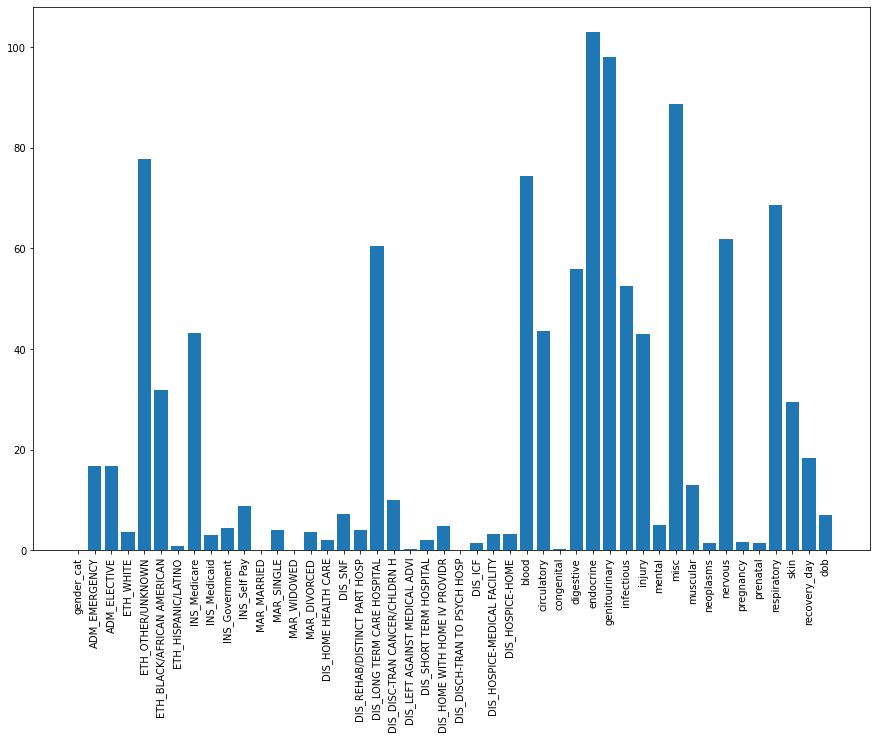

In [51]:
# what are scores for the features
for i in range(len(X_test.columns)):
    print( X_test.columns[i], fs.scores_[i])
# plot the scores
plt.figure(figsize=(15,10))
plt.bar([i for i in range(len(X_test.columns))], fs.scores_)
plt.xticks(range(len(X_test.columns)),X_test.columns, rotation=90)
plt.show()

select the most 18 important features

- 5 dummies from initial categorical varaible: ADM_ELECTIVE, ETH_OTHER/UNKNOWN, ETH_BLACK/AFRICAN,AMERICAN, INS_Medicare, DIS_LONG TERM CARE HOSPITAL.
- 12 numeric variables from bag of word representation of Diagnosis: blood, circulatory, digestive, endocrine ,genitourinary, infectious, injury, misc, muscular, nervous, respiratory, skin. 
- recovery_day: number of days passed in hospital during the last hospitalization.

In [52]:
X1_train=X_train[['ADM_ELECTIVE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','INS_Medicare','DIS_LONG TERM CARE HOSPITAL','blood','circulatory','digestive', 'endocrine', 'genitourinary','infectious', 'injury', 'misc','muscular', 'nervous', 'respiratory','skin','recovery_day']] 
X1_test=X_test[['ADM_ELECTIVE','ETH_OTHER/UNKNOWN','ETH_BLACK/AFRICAN AMERICAN','INS_Medicare','DIS_LONG TERM CARE HOSPITAL','blood','circulatory','digestive', 'endocrine', 'genitourinary','infectious', 'injury', 'misc', 'muscular','nervous', 'respiratory','skin','recovery_day']]
    



In [53]:
X1_train.shape, X1_test.shape

((1748, 18), (721, 18))

plot the correlation matrix to check if the features are low correlated. 

In [54]:
X1_train = pd.DataFrame(X1_train)

<AxesSubplot:>

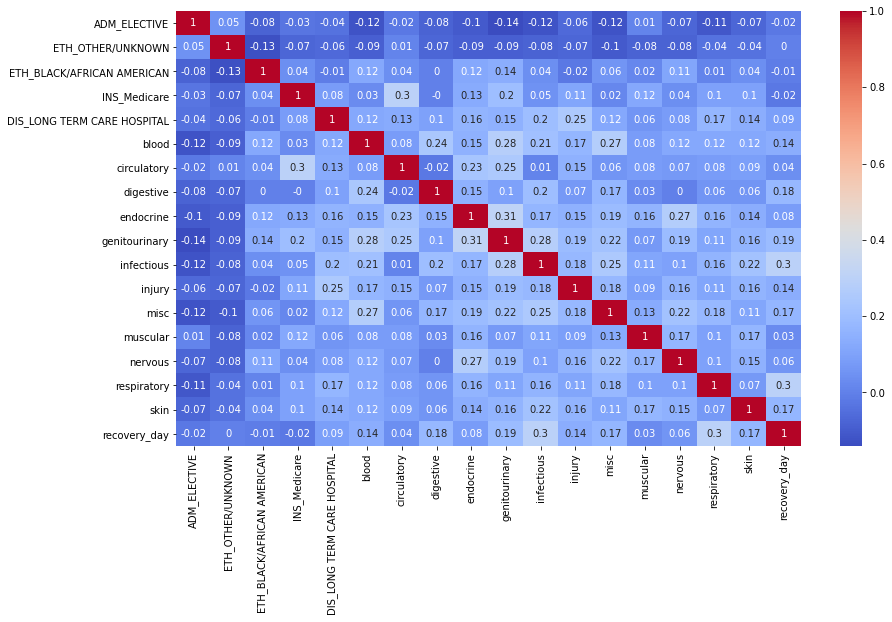

In [55]:
#plot the correlation of independent variables 
# Plot the correlation heatmap
from termcolor import colored as cl
plt.figure(figsize=(14, 8))
corr_matrix = X1_train.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

The correlation between the feature seems to be low. 

## Neural networks for no text  

In this section i will propose 3 different neural networks, than by  the evaluation of the metrics I will decide the best one in the conclusion section. 

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [57]:
#import the metcis 
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

#### Option A 

I create the most possible basic Neural Network and I will see how it perform. There is no neuron between the input and the output block. The aim of this Neural network is to find  19 parameters. The activation function is sigmoid in order to obtain output between 0 and 1 as my scaled  days_next_admit.    

In [58]:
modelA = Sequential()
modelA.add(Dense(units=1, input_shape=(18,), activation='sigmoid'))

I specify the loss function to use to evaluate a set of weights, I use mean square error since I deal with a regression problem. The optimizer,used to search through different weights for the network, is the efficient stochastic gradient descent algorithm, ADAM an extension to SGD. Finally the metric I would like to collect and report during training is the mean square error.

In [59]:
# compile the keras model
modelA.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

In [60]:
modelA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 19        
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


Before train the neural network I set up Earlystopping in order to Stop training when a monitored metric has stopped improving.
The Quantity to be monitored is the loss of the validation set. The minimum change in the monitored quantity to be qualify as an improvement is 0.001. After 5 epochs with no improvement the training will be stopped.
To print the training epoch on which training was stopped, the “verbose” argument is set to 1. I restore model weights from the epoch with the best value of the monitored quantity. I will use this Earlystopping for all no-text neural networks that I will implement. 

In [61]:
myCallbackNT = EarlyStopping(monitor='loss', min_delta=0.001, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=True)



I put 33% of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.

In [62]:
historyA=modelA.fit(X1_train, y_train_scaled, validation_split=0.33, epochs=100, batch_size=60, callbacks=[myCallbackNT])

Epoch 1/100
20/20 [==============================] - 1s 48ms/step - loss: 0.4945 - mean_squared_error: 0.4945 - val_loss: 0.4409 - val_mean_squared_error: 0.4409
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4645 - mean_squared_error: 0.4645 - val_loss: 0.4232 - val_mean_squared_error: 0.4232
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4483 - mean_squared_error: 0.4483 - val_loss: 0.4000 - val_mean_squared_error: 0.4000
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4081 - mean_squared_error: 0.4081 - val_loss: 0.3741 - val_mean_squared_error: 0.3741
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3812 - mean_squared_error: 0.3812 - val_loss: 0.3449 - val_mean_squared_error: 0.3449
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3432 - mean_squared_error: 0.3432 - val_loss: 0.3141 - val_mean_squared_error: 0.3141
Epoch 7/100
20/20 [==============

20/20 [==============================] - 0s 4ms/step - loss: 0.1702 - mean_squared_error: 0.1702 - val_loss: 0.1944 - val_mean_squared_error: 0.1944
Epoch 52/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1732 - mean_squared_error: 0.1732 - val_loss: 0.1937 - val_mean_squared_error: 0.1937
Epoch 53/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1694 - mean_squared_error: 0.1694 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 54/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1708 - mean_squared_error: 0.1708 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 55/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1649 - mean_squared_error: 0.1649 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 56/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.1923 - val_mean_squared_error: 0.1923
Epoch 57/100
20/20 [=====================

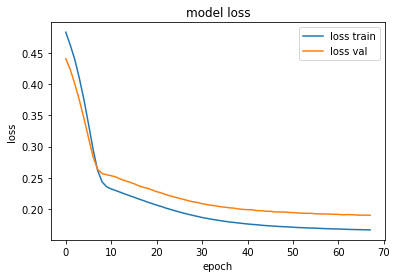

In [63]:
# plot history to check overfitting 
# list all data in history

# summarize history for loss
plt.plot(historyA.history['loss'])
plt.plot(historyA.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()



In [64]:
# evaluate the keras model train set 
modelA.evaluate(X1_train, y_train_scaled)

55/55 [==============================] - 0s 788us/step - loss: 0.1751 - mean_squared_error: 0.1751


[0.17513303458690643, 0.17513303458690643]

In [65]:
#prediction on test set 
predictionsA = modelA.predict(X1_test)

In [66]:
#mean square error regression loss 
mean_squared_error(y_test_scaled,predictionsA)

0.18477607763810636

In [67]:
#R^2 score 
r2_score(y_test_scaled,predictionsA)

0.16830879019030742

In [68]:
#explained variance
explained_variance_score(y_test_scaled,predictionsA)

0.19092055685457365

#### Option B

I create a Sequential model and add layers one at a time. Fully connected layers are defined using the Dense class. I  use the rectified linear unit activation function referred  as ReLU on the first two layers and the Sigmoid function in the output layer. I use a sigmoid on the output layer to ensure our network output is between 0 and 1 as my scaled output variable. 

In [69]:
# define the keras model
modelB = Sequential()
modelB.add(Dense(12, input_dim=18, activation='relu'))
modelB.add(Dense(6, activation='relu'))
modelB.add(Dense(1, activation='sigmoid'))

As before I will use mean square error to evaluate a set of weights, as before the optimaizer is ADAM and the main  metric I would like to collect is again the mean square error. 

In [70]:
# compile the keras model
modelB.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

In [71]:
modelB.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


I use the same Earlystopping previously declared (myCallbackNT) and I put 33% of the training data to be used as validation data.

In [72]:
# fit model
historyB=modelB.fit(X1_train, y_train_scaled, validation_split=0.33, epochs=100, batch_size=60, callbacks=[myCallbackNT])

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.3200 - mean_squared_error: 0.3200 - val_loss: 0.3546 - val_mean_squared_error: 0.3546
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3051 - mean_squared_error: 0.3051 - val_loss: 0.3276 - val_mean_squared_error: 0.3276
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2649 - mean_squared_error: 0.2649 - val_loss: 0.2894 - val_mean_squared_error: 0.2894
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2391 - mean_squared_error: 0.2391 - val_loss: 0.2452 - val_mean_squared_error: 0.2452
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2245 - mean_squared_error: 0.2245 - val_loss: 0.2161 - val_mean_squared_error: 0.2161
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1949 - mean_squared_error: 0.1949 - val_loss: 0.2092 - val_mean_squared_error: 0.2092
Epoch 7/100
20/20 [==============

20/20 [==============================] - 0s 4ms/step - loss: 0.1494 - mean_squared_error: 0.1494 - val_loss: 0.1844 - val_mean_squared_error: 0.1844
Epoch 52/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1572 - mean_squared_error: 0.1572 - val_loss: 0.1855 - val_mean_squared_error: 0.1855
Epoch 53/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1498 - mean_squared_error: 0.1498 - val_loss: 0.1845 - val_mean_squared_error: 0.1845
Epoch 54/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1525 - mean_squared_error: 0.1525 - val_loss: 0.1847 - val_mean_squared_error: 0.1847
Epoch 55/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1464 - mean_squared_error: 0.1464 - val_loss: 0.1836 - val_mean_squared_error: 0.1836
Epoch 56/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1485 - mean_squared_error: 0.1485 - val_loss: 0.1846 - val_mean_squared_error: 0.1846
Epoch 57/100
20/20 [=====================

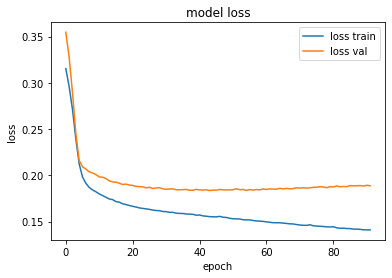

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history  
# list all data in history

# summarize history for loss
plt.plot(historyB.history['loss'])
plt.plot(historyB.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()

# summarize history for loss
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model acc')
#plt.ylabel('acc')
#plt.xlabel('epoch')
#plt.legend(['acc train', 'acc val'], loc='best')
#plt.show()

In [74]:
# evaluate the keras model train set 
modelB.evaluate(X1_train, y_train_scaled)


55/55 [==============================] - 0s 805us/step - loss: 0.1570 - mean_squared_error: 0.1570


[0.15695761144161224, 0.15695761144161224]

In [75]:
#store the prediction on the test set 
predictionsB = modelB.predict(X1_test)

In [76]:
#Mean squared error regression loss
mean_squared_error(y_test_scaled, predictionsB)

0.18787478367791366

In [77]:
#R^2 (coefficient of determination) regression score function
r2_score(y_test_scaled,predictionsB)

0.1543612781095528

In [78]:
#Explained variance regression score function.
explained_variance_score(y_test_scaled,predictionsB)

0.16291598324389778

#### Option C

 As in option B, I create a Sequential model and add layers one at a time. I use one fully connected layers between the input and the output. Some research suggested the number of neural nodes in hidden layers to be between 2/3 to 2 times of the size of the input layer. Since I have 18 features as input I take 11 hidden layers. As before  I  use the rectified linear unit activation function referred to as ReLU on the first  layers and the Sigmoid function in the output layer. 


In [79]:
#define the keras model
modelC = Sequential()
modelC.add(Dense(11, input_dim=18, activation='relu'))
modelC.add(Dense(1, activation='sigmoid'))


As before I will use mean square error to evaluate a set of weights, as before the optimaizer is ADAM and the main  metric I would like to collect is again the mean square error. 

In [80]:
# compile the keras model
modelC.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

In [81]:
modelC.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                209       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 12        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


I use the same Earlystopping previously declared (myCallbackNT) and I put 33% of the training data to be used as validation data.

In [82]:
historyC=modelC.fit(X1_train, y_train_scaled, validation_split=0.33, epochs=100, batch_size=60, callbacks=[myCallbackNT])

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.2923 - mean_squared_error: 0.2923 - val_loss: 0.2426 - val_mean_squared_error: 0.2426
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2306 - mean_squared_error: 0.2306 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2216 - mean_squared_error: 0.2216 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2120 - mean_squared_error: 0.2120 - val_loss: 0.2184 - val_mean_squared_error: 0.2184
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1976 - mean_squared_error: 0.1976 - val_loss: 0.2139 - val_mean_squared_error: 0.2139
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1900 - mean_squared_error: 0.1900 - val_loss: 0.2090 - val_mean_squared_error: 0.2090
Epoch 7/100
20/20 [==============

20/20 [==============================] - 0s 4ms/step - loss: 0.1464 - mean_squared_error: 0.1464 - val_loss: 0.1831 - val_mean_squared_error: 0.1831
Epoch 52/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1547 - mean_squared_error: 0.1547 - val_loss: 0.1824 - val_mean_squared_error: 0.1824
Epoch 53/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1577 - mean_squared_error: 0.1577 - val_loss: 0.1827 - val_mean_squared_error: 0.1827
Epoch 54/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1607 - mean_squared_error: 0.1607 - val_loss: 0.1832 - val_mean_squared_error: 0.1832
Epoch 55/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1535 - mean_squared_error: 0.1535 - val_loss: 0.1821 - val_mean_squared_error: 0.1821
Restoring model weights from the end of the best epoch.
Epoch 00055: early stopping


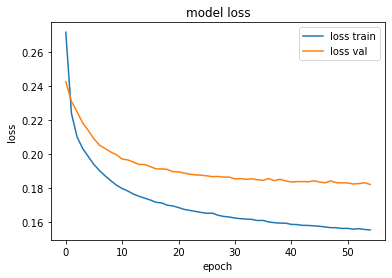

In [83]:
# plot history to check overfitting 
# list all data in history

# summarize history for loss
plt.plot(historyC.history['loss'])
plt.plot(historyC.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()




In [84]:
# evaluate the keras model train set 
modelC.evaluate(X1_train, y_train_scaled)

55/55 [==============================] - 0s 823us/step - loss: 0.1649 - mean_squared_error: 0.1649


[0.16489346325397491, 0.16489346325397491]

In [85]:
#prediction on the test set 
predictionsC = modelC.predict(X1_test)

In [86]:
#mean square error regression loss 
mean_squared_error(y_test_scaled,predictionsC)

0.17832514416861525

In [87]:
#R^2 score
r2_score(y_test_scaled,predictionsC)

0.19734493345204984

In [88]:
#explained variance score
explained_variance_score(y_test_scaled,predictionsC)

0.20987429737932484

In [89]:
#prediction in days 
predictionsC_notscaled=scaler.inverse_transform(predictionsC)
#mse on Number of days 
mse_notext=mean_squared_error(y_test,predictionsC_notscaled)

## Neural network for no text and text info 

Before proceeding with the implementation of the neural network with no-text and text info, I will treat normalized doctor's reports.

Each  normalized clinical report is a variable sequence of words and the information inside each report must be used to predict the number of days before the next re-hospitalization. 

In [90]:
#selection of test from train and test set 
test=df_test1['text']
train=df_train1['text']

I look at the train set in order to decide the size of interest (How many word I would like to model). 

In [91]:
# top 500 word frequencies 
top_N = 600
a = train.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])




In [92]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [93]:
print(rslt)

               Word  Frequency
0                wa      40352
1                po      17905
2               one      11050
3                hi       9893
4              last       7694
5              left       6699
6                pt       5625
7             right       5285
8            hospit       4796
9              pain       4505
10              thi       4477
11         hospital       3686
12               ha       3678
13             need       3446
14               ct       3283
15          continu       3116
16           normal       2962
17            first       2920
18            refil       2514
19             disp       2390
20               qh       2330
21            chest       2309
22           capsul       2267
23            pleas       2205
24            start       2065
25            everi       2040
26               sp       1952
27            given       1899
28           arteri       1853
29            statu       1756
30             valv       1693
31      

Taking into account the most 500 frequent words seems resonable, the occurence of the last words is near 100 times. 

I decided to treat text info with Bag of Word and NLP. 

I will limit the total number of words that I am  interested in modeling to the 500 most frequent words. 

In [94]:

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding,Input, concatenate 
from tensorflow.keras.preprocessing import sequence

In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer

from nltk.corpus import stopwords
#nltk.download('stopwords')


FILTERS='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
VOCABULARY_SIZE = 500 # Max the vocabulary size look at the frequancies below to decide it 

# create the tokenizer
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE,
              filters=FILTERS,
              split=' ',
              lower=True,  
              oov_token="_UNK_")

# fit the tokenizer on the documents
tokenizer.fit_on_texts(train)
print('Found %s unique tokens.' % len(tokenizer.word_index))

# encode documents
X_train_enc = tokenizer.texts_to_sequences(train)
X_test_enc = tokenizer.texts_to_sequences(test)

Found 2548 unique tokens.


Since each tokenized report have different length, I will decide a cut off point, to standardize the length of each report. To do that I will look at the cumulative distribution of the tokenized reports. 

In [96]:
#text size on the train set

length = []
for review in X_train_enc:
    length += [len(review)]
        
max_length = max(length)
max_length

2679

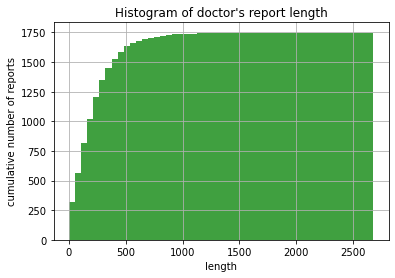

In [97]:
#the histogram of the data
plt.hist(length, 50, density=False, cumulative=True, facecolor='g', alpha=0.75)

plt.xlabel('length')
plt.ylabel('cumulative number of reports')
plt.title("Histogram of doctor's report length")
plt.grid(True)
plt.show()

Almost all  tokenized clinical reports have less than 1000 words. I decide to truncate at 750 in order to reduce the loss of information and speed up the time to train the neural network. 
The sequence length (number of words) in each reports varies, so I will constrain each report to be 750 words, truncating long report and pad the shorter reports with zero values.

In [98]:
# keep the top n words, zero the rest
top_words = 500
# truncate and pad input sequences
max_report_length = 750
X2_train = sequence.pad_sequences(X_train_enc, maxlen=max_report_length)
X2_test = sequence.pad_sequences(X_test_enc, maxlen=max_report_length)

### The network

 In this neural network I try to combine numeric features (numeric_input) and text information. 

I use a  LSTM model and combine its output with the numeric features. Therefore I define two input layers and treat them in separate models (nlp_input and numeric_input). The NLP data goes through the embedding transformation and the LSTM layer. The first layer is the Embedded layer that uses 16 length vectors to represent each word. The next layer is the LSTM layer with 80 memory units (smart neurons). The numeric_input is just used as it is, so I can just concatenate it with the lstm output (nlp_out). This combined vector is now passed in the finally sigmoid dense layer.

<img src="Screenshot 2021-02-25 at 10.59.25.png">

In [99]:
#create the model 
embedding_vecor_length=16
nlp_input = Input(shape=(max_report_length,), name='nlp_input') #each report in composed by 750 token (pad sequence previously compute)
numeric_input = Input(shape=(18,), name='numeric_input') #18 features previously selected
emb = Embedding(top_words, embedding_vecor_length, input_length=max_report_length)(nlp_input)
nlp_out =(LSTM(80))(emb)
x = concatenate([nlp_out, numeric_input])
x = Dense(1, activation='sigmoid')(x)
modelD = Model(inputs=[nlp_input , numeric_input], outputs=[x])

In [100]:
modelD.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
nlp_input (InputLayer)          [(None, 750)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 750, 16)      8000        nlp_input[0][0]                  
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 80)           31040       embedding[0][0]                  
__________________________________________________________________________________________________
numeric_input (InputLayer)      [(None, 18)]         0                                            
______________________________________________________________________________________________

Although I will train the neural network for few epoch I set up Earlystopping.
The Quantity to be monitored is again the mean square error of the validation set. The minimum change in the monitored quantity to be qualify as an improvement is 0.001. After 1 epochs with no improvement the training will be stopped.


In [101]:
ourCallbackD = EarlyStopping(monitor='loss', min_delta=0.001, patience=1, verbose=1, mode='auto', baseline=None, restore_best_weights=True)



As before I will use mean square error to evaluate a set of weights, as before the optimaizer is ADAM and the main  metric I would like to collect is again the mean square error. 

In [102]:
modelD.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

The model is fit for only 3 epochs because it quickly overfits the problem. A large batch size of 16 is used. The 33% of train set is used as validation set. 

In [103]:
historyD=modelD.fit([X2_train,X1_train], y_train_scaled, validation_split=0.33, epochs=3, batch_size=16,callbacks=[ourCallbackD])

Epoch 1/3
74/74 [==============================] - 40s 511ms/step - loss: 0.2520 - mean_squared_error: 0.2520 - val_loss: 0.2071 - val_mean_squared_error: 0.2071
Epoch 2/3
74/74 [==============================] - 25s 341ms/step - loss: 0.1781 - mean_squared_error: 0.1781 - val_loss: 0.1806 - val_mean_squared_error: 0.1806
Epoch 3/3
74/74 [==============================] - 25s 342ms/step - loss: 0.1497 - mean_squared_error: 0.1497 - val_loss: 0.1811 - val_mean_squared_error: 0.1811


In [104]:
#prediction on the test set 
predictionsD = modelD.predict([X2_test,X1_test])

In [105]:
#mean square error 
mean_squared_error(y_test_scaled,predictionsD)

0.17847966941101395

In [106]:
#R^2 score
r2_score(y_test_scaled,predictionsD)

0.1966494035574905

In [107]:
#explained variance
explained_variance_score(y_test_scaled,predictionsD)

0.21211372026174624

In [108]:
#prediction in days 
predictionsD_notscaled=scaler.inverse_transform(predictionsD)
#mse on Number of days 
mse_text=mean_squared_error(y_test,predictionsD_notscaled)

## Conclusion and possible future work

In this section I will select the best model, for no-text neural networks and discuss possible works related to no-text and text info neural network. 


For no text info neural network my best is model C. Comparing the metrics with the others two, model C has the lowest mean square error and the greatest explained variance.In addition model B seems to be overfit, the mean square error computed in the validation set start to increase in the final epochs, before Earlystoppig.
Regarding the model D in which I combine numeric variable and text info I obtained a mean square error and a score of explained variance really similar to modelC. One of the problem with recurrent neural networks is that they quick overfit, in fact I have just trained the model for 3 epochs. RNN and LSTM are frequently used with k-fold cross validation. In this case study it's not possible applying k-fold cross validation, but in any further application of RNN with the MIMIC dataset a careful pre-process must be re-think, in order to avoid the impact of the test set on the selection of the features.     

The MSE for no text NN in number of days is:

In [109]:
mse_notext

23678.151747118325

The MSE for text and no text NN in number of days is: 

In [110]:
mse_text

23698.669874194704